# Part 2 :Sentiment Analysis Prediction

In [149]:
#importing required libs
import tweepy
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 1.Extracting tweets about the news according to the choice of cryptocurrency entered by the user.

In [150]:
consumer_key = "bpc3PoE0WYDPLANrjF6bxKU6V"
consumer_secret = "inY3jXiXFKuzdexomqa76h2xY9scEZhpDIchsT5pbMqZXx8g7l"
access_token =  "1481145969391841280-QpYxOkxap8cJAb50DhrAldzRLVgdL6"
access_token_secret = "eGBJD360SXzbG77j4U78JEAUOFHUuXvMCuYkmTLedU1iE"

In [151]:
#authenticate to use the keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [152]:
#Extracting specific tweets of crypto news from twitter
search_words = "#btc -filter:retweets"

In [153]:
tweets = tweepy.Cursor(api.search_tweets,q=search_words,lang="en").items(200)
tweets

tweets_copy=[]
for i in tweets:
    tweets_copy.append(i)
print("Total Tweets fetched: ",len(tweets_copy))

Total Tweets fetched:  200


In [154]:
print(tweets_copy[0])

Status(_api=<tweepy.api.API object at 0x000001EF2773F4C0>, _json={'created_at': 'Wed Mar 16 09:29:15 +0000 2022', 'id': 1504027000935268356, 'id_str': '1504027000935268356', 'text': '#BTC is pricing in a possible dovish stance might come from fed frontiers. This can only mean they’ll dump it after… https://t.co/YX9pxtMBQb', 'truncated': True, 'entities': {'hashtags': [{'text': 'BTC', 'indices': [0, 4]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/YX9pxtMBQb', 'expanded_url': 'https://twitter.com/i/web/status/1504027000935268356', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1446926384086016002, 'id_str':

### 2. Makin a dataframe out of the tweets extracted

In [155]:
import pandas as pd
tweets_df = pd.DataFrame()
for tweets in tweets_copy:
    hashtags=[]
    try:
        for hashtag in tweets.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweets.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'date': tweets.created_at,
                                              'news': api.get_status(id = tweets.id,tweet_mode = 'extended').full_text,
                                              'hashtags': [hashtags if hashtags else None]}))
    tweets_df = tweets_df.reset_index(drop=True)
    
#print dataframe
tweets_df.head(10)
    

,date,news,hashtags
0,2022-03-16 09:29:15+00:00,#BTC is pricing in a possible dovish stance mi...,[BTC]
1,2022-03-16 09:29:14+00:00,El Salvador’s President Bukele Has An 85% Appr...,None
2,2022-03-16 09:29:13+00:00,"For the past 5 years, the US worried more abou...",None
3,2022-03-16 09:29:13+00:00,lala DeFi Launches High Yield Multiple Staking...,"[BTC, CRYPTONEWS, NFT]"
4,2022-03-16 09:29:13+00:00,Bitcoin calls traders‘ bluff with fresh $40K f...,"[BTC, CRYPTONEWS, NFT, BTC]"
5,2022-03-16 09:29:13+00:00,‘Unlucky:’ Agave and Hundred Finance DeFi prot...,"[BTC, CRYPTONEWS, NFT]"
6,2022-03-16 09:29:13+00:00,"Chainlink (LINK) Coils above Crucial Support, ...","[BTC, CRYPTONEWS, NFT, LINK]"
7,2022-03-16 09:29:13+00:00,Harnessing the Power of Blockchain to Build a ...,None
8,2022-03-16 09:29:12+00:00,#BTC okay that was quick baby https://t.co/vTR...,[BTC]
9,2022-03-16 09:29:10+00:00,@MetaRPGNFT #creoengineDeveloping and deployin...,"[creoengineDeveloping, Decentralised]"


### 3. Cleaning the text from the tweets 

In [156]:
#Clean the news

#creating a function to clean the news
def CleanTxt(text):
    text = re.sub(r'@[A-za-z0-9]+','', text) #removed @mentions
    text = re.sub(r'#', '', text)#Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)# Remove the hyper link
    
    return text

tweets_df['news'] = tweets_df['news'].apply(CleanTxt)



In [167]:
#converting news to lower case
tweets_df['news'] = tweets_df['news'].str.lower()

### 4. Checking for sentiments(positive or negative or neutral)

In [169]:
#creating a function to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

tweets_df['Subjectivity']= tweets_df['news'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['news'].apply(getPolarity)

#Dataframe after the addition of 2 coloumns
tweets_df

,date,news,hashtags,Subjectivity,Polarity,Analysis
0,2022-03-16 09:29:15+00:00,btc is pricing in a possible dovish stance mig...,[BTC],0.671875,-0.078125,Negative
1,2022-03-16 09:29:14+00:00,el salvador’s president bukele has an 85% appr...,None,0.327273,0.168182,Positive
2,2022-03-16 09:29:13+00:00,"for the past 5 years, the us worried more abou...",None,0.312500,0.012500,Positive
3,2022-03-16 09:29:13+00:00,lala defi launches high yield multiple staking...,"[BTC, CRYPTONEWS, NFT]",0.270000,0.080000,Positive
4,2022-03-16 09:29:13+00:00,bitcoin calls traders‘ bluff with fresh $40k f...,"[BTC, CRYPTONEWS, NFT, BTC]",0.500000,0.300000,Positive
...,...,...,...,...,...,...
195,2022-03-16 09:21:44+00:00,why anybody dont help humanism was died? 🙏 \n\...,None,0.500000,-0.187500,Negative
196,2022-03-16 09:21:42+00:00,and because china is pouring loads into chain...,[BTC],0.000000,0.000000,Neutral
197,2022-03-16 09:21:41+00:00,"3/16/2022 12:20\n""the pusht binance trade si...",None,0.000000,0.000000,Neutral
198,2022-03-16 09:21:41+00:00,"btc price now is: 40,421.79usd and the day's r...","[BTC, Bitcoin, bitcoin, blockchain]",0.000000,0.000000,Neutral


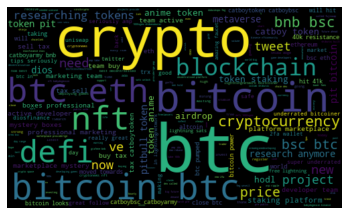

In [170]:
#plot the word cloud 
allWords = ' '.join( [twts for twts in tweets_df['news']])
wordCloud = WordCloud(width = 500, height= 300, random_state= 21, max_font_size=99).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [171]:
#computing negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweets_df['Analysis'] = tweets_df['Polarity'].apply(getAnalysis)

tweets_df

,date,news,hashtags,Subjectivity,Polarity,Analysis
0,2022-03-16 09:29:15+00:00,btc is pricing in a possible dovish stance mig...,[BTC],0.671875,-0.078125,Negative
1,2022-03-16 09:29:14+00:00,el salvador’s president bukele has an 85% appr...,None,0.327273,0.168182,Positive
2,2022-03-16 09:29:13+00:00,"for the past 5 years, the us worried more abou...",None,0.312500,0.012500,Positive
3,2022-03-16 09:29:13+00:00,lala defi launches high yield multiple staking...,"[BTC, CRYPTONEWS, NFT]",0.270000,0.080000,Positive
4,2022-03-16 09:29:13+00:00,bitcoin calls traders‘ bluff with fresh $40k f...,"[BTC, CRYPTONEWS, NFT, BTC]",0.500000,0.300000,Positive
...,...,...,...,...,...,...
195,2022-03-16 09:21:44+00:00,why anybody dont help humanism was died? 🙏 \n\...,None,0.500000,-0.187500,Negative
196,2022-03-16 09:21:42+00:00,and because china is pouring loads into chain...,[BTC],0.000000,0.000000,Neutral
197,2022-03-16 09:21:41+00:00,"3/16/2022 12:20\n""the pusht binance trade si...",None,0.000000,0.000000,Neutral
198,2022-03-16 09:21:41+00:00,"btc price now is: 40,421.79usd and the day's r...","[BTC, Bitcoin, bitcoin, blockchain]",0.000000,0.000000,Neutral


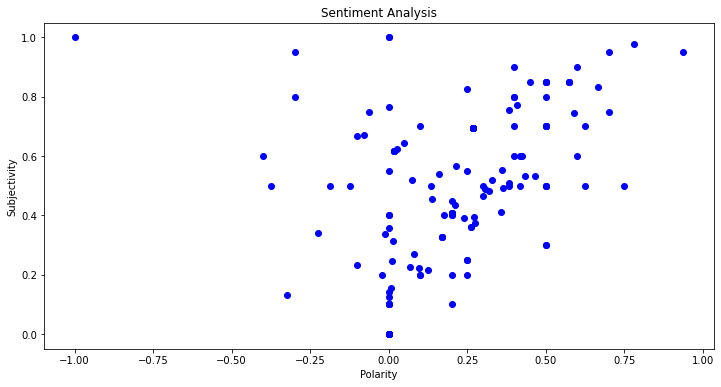

In [172]:
#plot to show polarity and subjectivity
plt.figure(figsize=(12,6))
for i in range(0, tweets_df.shape[0]):
    plt.scatter(tweets_df['Polarity'][i],tweets_df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### 5.Getting % of positive , negative and neutral tweets.

In [173]:
ptweets = tweets_df[tweets_df.Analysis == 'Positive']
ptweets = ptweets['news']

PosPer = round( (ptweets.shape[0]/tweets_df.shape[0]) *100, 1)
PosPer

52.5

In [174]:
ntweets = tweets_df[tweets_df.Analysis == 'Negative']
ntweets = ntweets['news']

NegPer=round( (ntweets.shape[0]/tweets_df.shape[0]) *100, 1)
NegPer

7.5

In [175]:
neutweets = tweets_df[tweets_df.Analysis == 'Neutral']
neutweets = neutweets['news']

NeuPer = round( (neutweets.shape[0]/tweets_df.shape[0]) *100, 1)
NeuPer

40.0

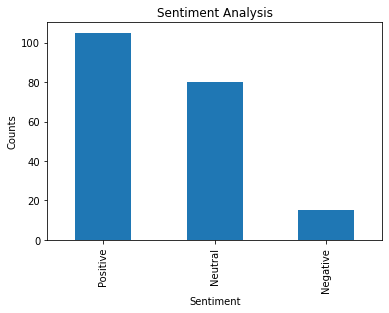

In [176]:
#showing these values in form of a bar chart

tweets_df['Analysis'].value_counts()

#plot and visuwalize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets_df['Analysis'].value_counts().plot(kind='bar')
plt.show()

### 6.Comapring %'s of sentiments and predicting accordingly

In [177]:
from termcolor import colored
#predicting the prices result based upon the sentiments
result = ' '
def Prediction(positive, negative, neutral):
  
    if (positive >= negative) and (positive >= neutral):
        result = "\u0332".join("Currency prices are likey to increase") 
  
    elif (negative >= positive) and (negative >= neutral):
        result = "\u0332".join("Currency prices are likey to decrease")
    else:
        result = "\u0332".join("Currency prices might remain same")
          
    return result

print(colored(Prediction(positive, negative, neutral),'blue', attrs=['bold']))

C̲u̲r̲r̲e̲n̲c̲y̲ ̲p̲r̲i̲c̲e̲s̲ ̲a̲r̲e̲ ̲l̲i̲k̲e̲y̲ ̲t̲o̲ ̲i̲n̲c̲r̲e̲a̲s̲e
